In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
df=pd.read_csv("../input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we have a general idea of the data set contents.

0    549
1    342
Name: Survived, dtype: int64


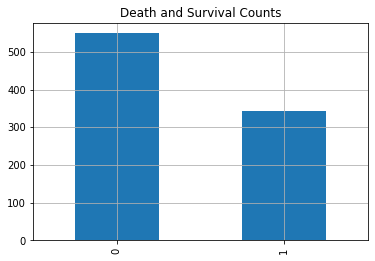

In [4]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
print(df['Survived'].value_counts())
plt.show()

From this,we infer that majority of people did not survive the accident.

male      577
female    314
Name: Sex, dtype: int64


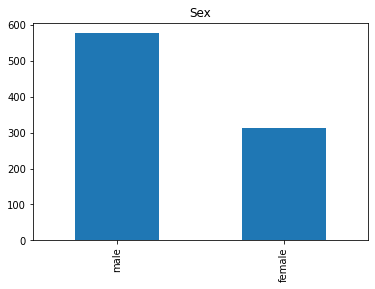

In [5]:
df['Sex'].value_counts().plot(kind='bar', title='Sex')
print(df['Sex'].value_counts())
plt.show()


It can be infered that the majority of people in the ship were male

3    491
1    216
2    184
Name: Pclass, dtype: int64


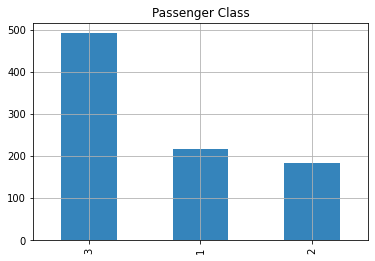

In [6]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
print(df['Pclass'].value_counts())
plt.show()

It can be infered that the largest number of passengers were in class 3 followed by class 1 and class 2.

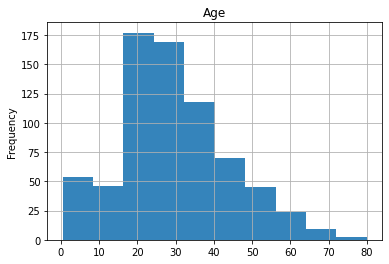

In [7]:
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

It can be infered that majority of passengers were in the age group 15-30 years.

**Feature 1;Passenger Class**

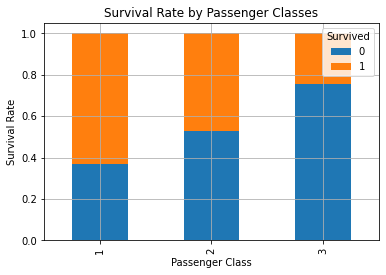

In [8]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

 This Shows that the First class has the highest Chance for Survival.

**Feature2 : Sex**
We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

In [9]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


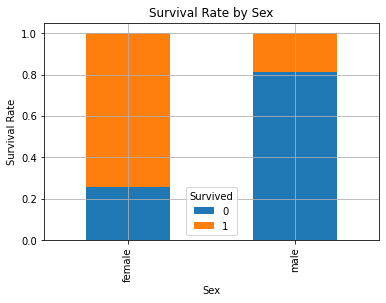

In [10]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True) 
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

The majority of females survived, whereas the majority of males did not.

Count males and females in each Pclass:

In [11]:
# Get the unique values of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [12]:
for i in passenger_classes:
        print ('M : ',i ,len(df[(df['Sex'] == 'male')  & (df['Pclass'] == i)]))
        print ('F : ',i ,len(df[(df['Sex'] =='female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


Plot survival rate by Sex and Pclass:

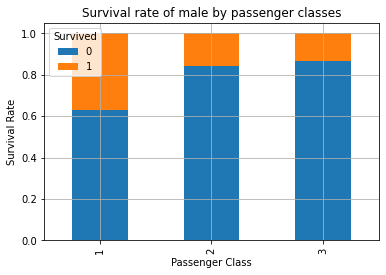

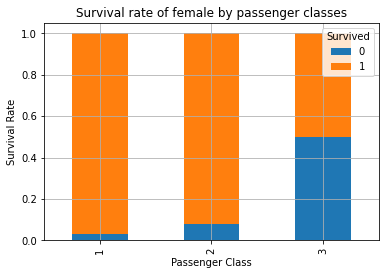

In [13]:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Feature3 : Embraked**

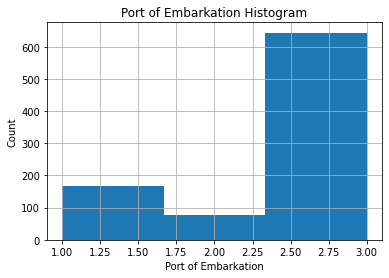

In [14]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())

df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':

In [15]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,NaN


In [16]:
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0]

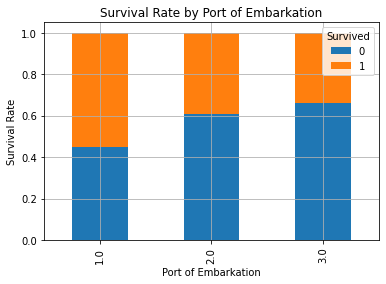

In [17]:
embarked_rel=pd.crosstab(df['Embarked_Value'],df['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

**Feature4 : Age**

In [18]:
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Value
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,3.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,2.0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1,3.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0,1.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0,2.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1,1.0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1,1.0


Here also many ages are missing. So we assign the missing ages the median values of the age according to their sex and passenger class.

In [19]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))
df['Age_complete'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_complete, dtype: float64

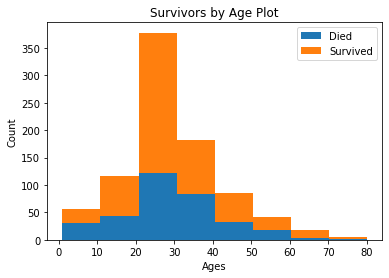

In [20]:
age_survived=df[df['Survived']==1]['Age_complete']
age_not_survived = df[df['Survived'] == 0]['Age_complete']
max_age=max(df['Age_complete'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

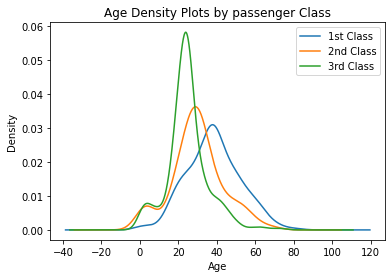

In [21]:
for i in passenger_classes :
        df.Age_complete[df.Pclass==i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

Thus we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.

**Feature5 : Family Size**

We define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

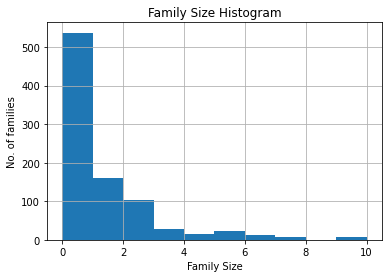

In [22]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()

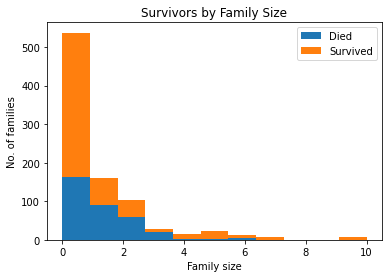

In [23]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived=df[df['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

**Data for machine learning**

We drop the columns having strings in it or those which we have used like we remove SibSp and Parch as we use Family_Size which has the attributes of both of them.

In [24]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
df.head(10)

,Survived,Pclass,Fare,Sex_Val,Age_complete,Family_Size
0,0,3,7.2500,1,22.0,1
1,1,1,71.2833,0,38.0,1
2,1,3,7.9250,0,26.0,0
3,1,1,53.1000,0,35.0,1
4,0,3,8.0500,1,35.0,0
5,0,3,8.4583,1,25.0,0
6,0,1,51.8625,1,54.0,0
7,0,3,21.0750,1,2.0,4
8,1,3,11.1333,0,27.0,2
9,1,2,30.0708,0,14.0,1


It is a summary of the operations we performed on our training data set. We encapsulate this in a function since we'll need to do the same operations to our test set later.

In [25]:
def data_prep(df_given):
    # Get the unique values of Sex
    sexes = sorted(df_given['Sex'].unique())
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
   # Transform Sex from a string to a number representation
    df_given['Sex_Val'] = df_given['Sex'].map(genders_mapping).astype(int)
        # Get the unique values of Embarked
    df_given['Embarked_Value']=df_given['Embarked']
    df_given['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
    df_given['Embarked_Value']=df_given['Embarked_Value'].fillna(3)
   # embarked_locs = sorted(df_given['Embarked_Value'].unique())
    # Fill in missing values of Fare with the average Fare
    if len(df_given[df_given['Fare'].isnull()]) > 0:
        avg_fare = df_given['Fare'].mean()
        df_given['Fare'].fillna(avg_fare, inplace=True)
    df_given['Age_complete'] = df_given['Age']
    df_given['Age_complete']=df_given['Age_complete'].groupby([df_given['Sex_Val'],df_given['Pclass']]).apply(lambda x: x.fillna(x.median()))
    df_given['Family_Size'] = df_given['SibSp'] + df_given['Parch']
    # Drop the columns we won't use:
    # Drop the Age column since we will be using the Age_omplete column instead.
    # Drop the SibSp and Parch columns since we will be using Family_Size.
    # Drop the PassengerId column since it won't be used as a feature.
    df_given=df_given.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)#axis=1 means columns
    #if drop_passenger_id:
     #   df_given = df_given.drop(['PassengerId'], axis=1)
    
    return df_given

We store the data as numpy array to perform machine learning algorithms.

In [26]:
train_data=df.values

**Naive_Bayes Classifier**

In [27]:
clf = GaussianNB()

train_features includes all the columns except the Survived. train_target includes the Survived column.

In [28]:
train_features = train_data[:, 1:]
train_target = train_data[:, 0]

We fit the classifier

Reading and converting the test data to numpy array

In [29]:
df_test1 = pd.read_csv("../input/titanic/test.csv")    
df_test = data_prep(df_test1)
test_x1 = df_test.values

test_y1 is the predicted Survival values of the test data and thus our answer.

Now we check the accuracy of our databy training with 80% of our data and testing on rest 20%

In [30]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 5) (891,)
(712, 5) (712,)
(179, 5) (179,)


train_test_split here means that train_x and test_x are made from train_features and train_y and test_y are made from train_target

In [31]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Naive Bayes Accuracy = 0.82


In [32]:
test_y1 = clf.predict(test_x1)
test_y1

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

test_y1 is the predicted values of our test data i.e. test_x1

In [33]:
df_test1['Survived'] = test_y1
df_test1[['PassengerId','Survived']].to_csv('submission1.csv',index=False)

**Random Forest**

In [34]:
RandomForest = RandomForestClassifier(n_estimators=1000)
RandomForest.fit(train_x,train_y)
predict_y = RandomForest.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

RandomForest Accuracy = 0.84


In [35]:
df_test1['Survived'] = test_y1
df_test1[['PassengerId','Survived']].to_csv('submission2.csv',index=False)